In [21]:
#Optimistic initial values, it is a solution to Explore-Exploit Dilemma, i.e A/B Testing vs Human Emotion, it is
#basically GO GREEDY, take a very high initial guessm (which we know is very high)
#this outperforms epsilon_greedy
'''
pseudo code
pull current best arm
'''
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class Bandit:
    def __init__(self, m):
        #true mean
        self.m = m
        #our calculated mean
        self.mean = 10
        #iterations
        self.N = 0
    
    def pullArm(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1.0-1.0/self.N)*self.mean + (1.0/self.N)*x

In [8]:
def experiment(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    armSelectionData = np.empty(N)
    for i in range(N):
        arm = np.argmax([b.mean for b in bandits])
            #print (bandits[arm].mean)
            #print (arm)
        armSelectionData[i] = arm
        value = bandits[arm].pullArm()
        bandits[arm].update(value)
        data[i] = value
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average)
    #plt.plot(armSelectionData + 1)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    #plt.xscale('log')
    plt.show()
    #print(armSelectionData + 1)
    for b in bandits:
        print(b.mean)

    return cumulative_average

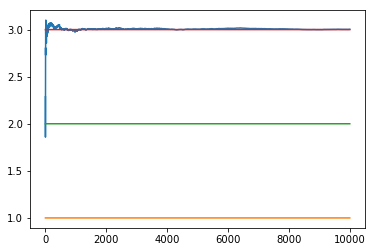

2.28663575609866
1.4294599560072978
3.003421300847113


In [9]:
if __name__ == '__main__':
    result = experiment(1.0, 2.0, 3.0, 10000)